The goal of this project is on Identity Theft in New York City using historical NYPD data from 2006 to April 2025. Does this data align with the Federal Trade Commission’s (“FTC”) national or metropolitan regional average?



In [10]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import timeit
import io

In [11]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully


In [12]:
#Import data set from NYC Open Data
df=pd.read_csv('/content/drive/MyDrive/NYPD_Arrests_Data_(Historic)_20260201.csv')

In [13]:
#verify number of rows/columns
df.shape

(5986025, 19)

In [14]:
#obtain correct column header names
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [15]:
#identify missing data
df.isnull().sum()

,0
ARREST_KEY,0
ARREST_DATE,0
PD_CD,884
PD_DESC,9169
KY_CD,9788
OFNS_DESC,9169
LAW_CODE,196
LAW_CAT_CD,24990
ARREST_BORO,8
ARREST_PRECINCT,0


In [16]:
#obtain police arrest codes to filter by
df.PD_DESC.unique()

array(['STRANGULATION 1ST', 'CRIMINAL MIS 2 & 3',
       'TRAFFIC,UNCLASSIFIED MISDEMEAN', 'WEAPONS, POSSESSION, ETC',
       'ROBBERY,OPEN AREA UNCLASSIFIED', 'FORCIBLE TOUCHING',
       'MENACING,UNCLASSIFIED', 'ASSAULT POLICE/PEACE OFFICER',
       'LARCENY,GRAND OF AUTO', 'CRIMINAL POSSESSION WEAPON',
       'FORGERY,ETC.,UNCLASSIFIED-FELO', 'PUBLIC ADMINISTATION,UNCLASS M',
       'NY STATE LAWS,UNCLASSIFIED FEL', 'INTOXICATED DRIVING,ALCOHOL',
       'THEFT OF SERVICES, UNCLASSIFIE', 'UNAUTHORIZED USE VEHICLE 3',
       'CONTROLLED SUBSTANCE, POSSESSI', 'LARCENY,PETIT FROM OPEN AREAS,',
       'ASSAULT 3', 'BURGLARY,UNCLASSIFIED,UNKNOWN',
       'CRIMINAL MISCHIEF 4TH, GRAFFIT', 'FORGERY,ETC.-MISD.',
       'ASSAULT 2,1,UNCLASSIFIED', 'MISCHIEF,CRIMINAL,    UNCL 2ND',
       'LARCENY,GRAND FROM OPEN AREAS, UNATTENDED', 'JOSTLING',
       'CONTEMPT,CRIMINAL', 'PUBLIC ADMINISTRATION,UNCLASSI',
       'CRIMINAL MISCHIEF,UNCLASSIFIED 4', 'RAPE 3',
       'PUBLIC SAFETY,UNCLASSIFIED M

In [17]:
#clean data by dropping unnecssary columns
df2 = df.drop(['PD_CD', 'KY_CD', 'OFNS_DESC', 'LAW_CAT_CD','ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat', 'LAW_CODE'], axis=1)

In [18]:
#confirm remaining columns
df2.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,ARREST_BORO,PERP_SEX,PERP_RACE
0,298704537,12/31/2024,STRANGULATION 1ST,M,M,BLACK
1,298686842,12/31/2024,CRIMINAL MIS 2 & 3,Q,M,ASIAN / PACIFIC ISLANDER
2,298663611,12/31/2024,"TRAFFIC,UNCLASSIFIED MISDEMEAN",B,M,BLACK
3,298682165,12/31/2024,CRIMINAL MIS 2 & 3,Q,M,WHITE HISPANIC
4,298672383,12/31/2024,"WEAPONS, POSSESSION, ETC",M,M,WHITE HISPANIC


In [19]:
#confirm what is missing
df2.isnull().sum()

,0
ARREST_KEY,0
ARREST_DATE,0
PD_DESC,9169
ARREST_BORO,8
PERP_SEX,0
PERP_RACE,0


In [20]:
#replace missing police arrest description with unknown
df2.PD_DESC = df2.PD_DESC.fillna('UNKNOWN')

In [21]:
df2.isnull().sum()

,0
ARREST_KEY,0
ARREST_DATE,0
PD_DESC,0
ARREST_BORO,8
PERP_SEX,0
PERP_RACE,0


In [22]:
#assign datetime value to arrest date field so that it can be sorted
df2['ARREST_DATE'] = pd.to_datetime(df2['ARREST_DATE'])

In [23]:
#verify value of column data
print(type(df2.ARREST_DATE[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [24]:
#sort by arrest description of interest
df3=df2[df2['PD_DESC'].str.contains('IDENTITY THFT')]
df3.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,ARREST_BORO,PERP_SEX,PERP_RACE
1191501,191459933,2018-12-23,IDENTITY THFT-1,Q,M,WHITE HISPANIC
1194171,191287257,2018-12-18,IDENTITY THFT-1,Q,M,BLACK
1194217,191287259,2018-12-18,IDENTITY THFT-1,Q,M,BLACK
1194298,191287255,2018-12-18,IDENTITY THFT-1,Q,M,BLACK
1197013,191121951,2018-12-13,IDENTITY THFT-2,K,M,WHITE


In [25]:
#sort be descending date - data was last updated April 2023 yet this arrest code stops in 2018. Manhattan DA/State penal law still shows on books
df3.sort_values(by='ARREST_DATE',ascending=False)

,ARREST_KEY,ARREST_DATE,PD_DESC,ARREST_BORO,PERP_SEX,PERP_RACE
1191501,191459933,2018-12-23,IDENTITY THFT-1,Q,M,WHITE HISPANIC
1194217,191287259,2018-12-18,IDENTITY THFT-1,Q,M,BLACK
1194298,191287255,2018-12-18,IDENTITY THFT-1,Q,M,BLACK
1194171,191287257,2018-12-18,IDENTITY THFT-1,Q,M,BLACK
1197013,191121951,2018-12-13,IDENTITY THFT-2,K,M,WHITE
...,...,...,...,...,...,...
5981264,10004340,2006-01-06,IDENTITY THFT-1,M,F,BLACK
5982433,9961265,2006-01-05,IDENTITY THFT-1,M,M,WHITE HISPANIC
5983926,9958588,2006-01-04,IDENTITY THFT-2,K,F,WHITE HISPANIC
5984526,9944418,2006-01-03,IDENTITY THFT-2,Q,F,WHITE HISPANIC


In [26]:
#identify boro abbreviations to change
df.ARREST_BORO.unique()

array(['M', 'Q', 'B', 'K', 'S', nan], dtype=object)

In [27]:
 #repalce boro abbreviations with full boro name
 df3.replace({'ARREST_BORO' : {'K':'KINGS', 'M':'MANHATTAN', 'B':'BRONX', 'S' : 'STATEN ISLAND', "Q" : 'QUEENS' }})

,ARREST_KEY,ARREST_DATE,PD_DESC,ARREST_BORO,PERP_SEX,PERP_RACE
1191501,191459933,2018-12-23,IDENTITY THFT-1,QUEENS,M,WHITE HISPANIC
1194171,191287257,2018-12-18,IDENTITY THFT-1,QUEENS,M,BLACK
1194217,191287259,2018-12-18,IDENTITY THFT-1,QUEENS,M,BLACK
1194298,191287255,2018-12-18,IDENTITY THFT-1,QUEENS,M,BLACK
1197013,191121951,2018-12-13,IDENTITY THFT-2,KINGS,M,WHITE
...,...,...,...,...,...,...
5981264,10004340,2006-01-06,IDENTITY THFT-1,MANHATTAN,F,BLACK
5982433,9961265,2006-01-05,IDENTITY THFT-1,MANHATTAN,M,WHITE HISPANIC
5983926,9958588,2006-01-04,IDENTITY THFT-2,KINGS,F,WHITE HISPANIC
5984526,9944418,2006-01-03,IDENTITY THFT-2,QUEENS,F,WHITE HISPANIC


<Axes: xlabel='ARREST_BORO'>

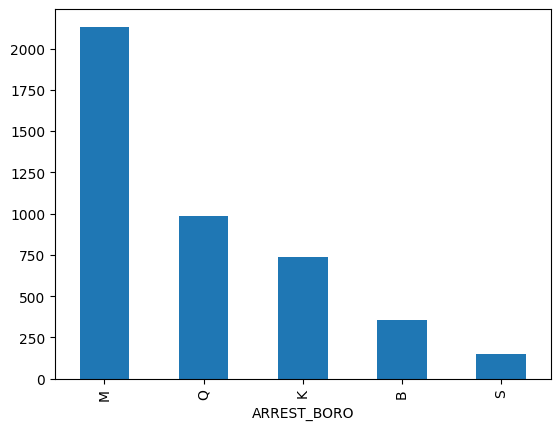

In [28]:
#visualize arrest data by boro with supporting group by numbers
df3.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

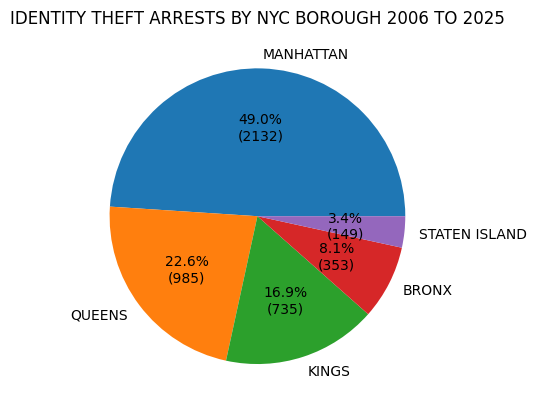

In [37]:
values=[2132, 985, 735, 353, 149  ]
labels=['MANHATTAN', 'QUEENS', 'KINGS', 'BRONX', 'STATEN ISLAND']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(values, labels=labels, autopct=lambda pct: func(pct, values))

plt.title('IDENTITY THEFT ARRESTS BY NYC BOROUGH 2006 TO 2025')

plt.show()

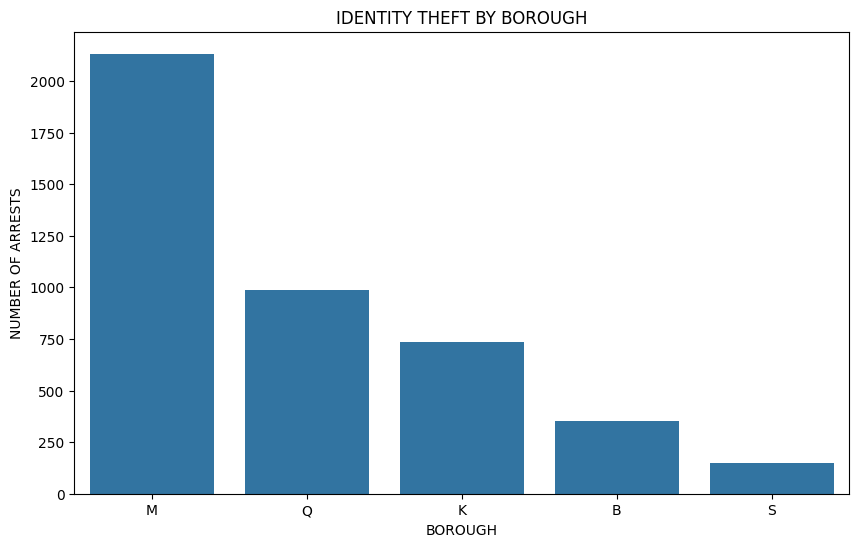

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ARREST_BORO', data=df3, order=df3['ARREST_BORO'].value_counts().index)
plt.title('IDENTITY THEFT BY BOROUGH')
plt.xlabel('BOROUGH')
plt.ylabel('NUMBER OF ARRESTS')
plt.show()

In [31]:
df3.groupby(['ARREST_BORO'])['ARREST_BORO'].count().sort_values(ascending=False)

,ARREST_BORO
ARREST_BORO,
M,2132
Q,985
K,735
B,353
S,149


<Axes: xlabel='PERP_RACE'>

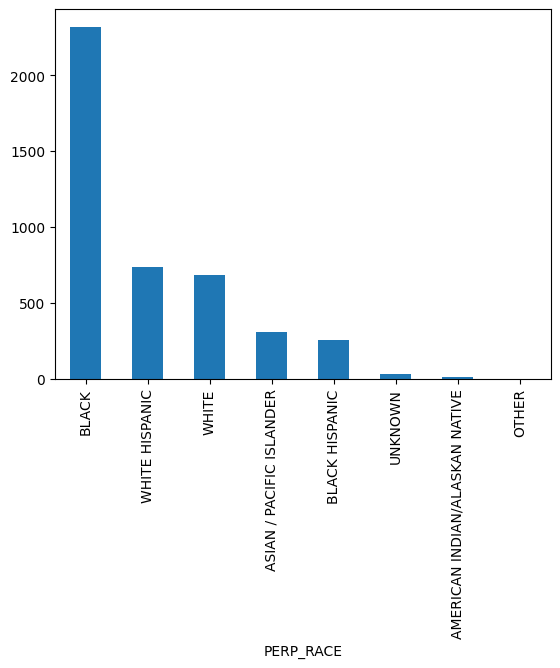

In [32]:
#visualize arrest data by perp race with supporting group by numbers
df3.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

In [33]:
df3.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=False)

,PERP_RACE
PERP_RACE,
BLACK,2319
WHITE HISPANIC,736
WHITE,685
ASIAN / PACIFIC ISLANDER,309
BLACK HISPANIC,259
UNKNOWN,32
AMERICAN INDIAN/ALASKAN NATIVE,12
OTHER,2


<Axes: xlabel='PERP_SEX'>

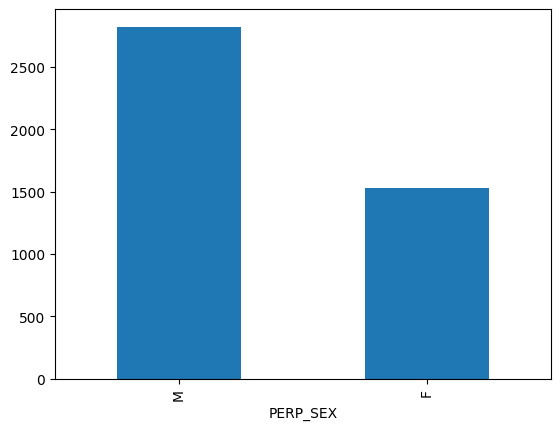

In [34]:
#visualize arrest data by perp sex with supporting group by numbers
df3.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

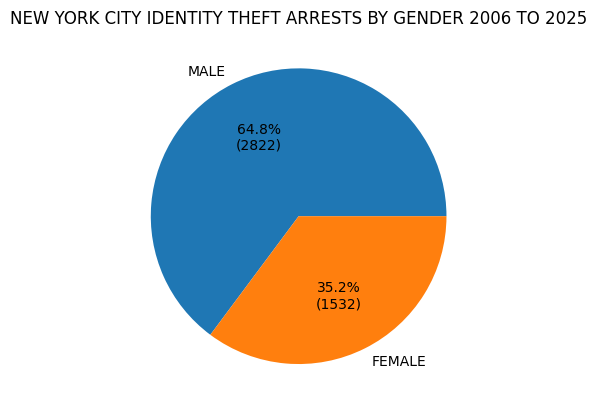

In [38]:
values=[2822, 1532 ]
labels=['MALE', 'FEMALE']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(values, labels=labels, autopct=lambda pct: func(pct, values))

plt.title('NEW YORK CITY IDENTITY THEFT ARRESTS BY GENDER 2006 TO 2025')

plt.show()

In [36]:
df3.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

,PERP_SEX
PERP_SEX,
M,2822
F,1532


Conclusion:
NYPD Historical Arrest Data covers a period from 2006 to April 2025 and Identity Theft arrest numbers were were reviewed to see if they correlate with the national averages.  The records stop in 2018 and no information could be located exlaining why they were no longer reported; however, the New York State Attorney General and Manhattan District Attorney's Offices both have Idenity Theft victim support links on their websites.

Identity Theft Arrests in Manhattan reprented almost half of NYC's arrests - 49% and black males were arrested at a rate almost three times that of other races.